## Policy vs Value iteration vs hybrid
Run time ~2min

In [1]:
import os
import math

os.chdir("../codes")

from ZUI_MDP_solution import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ignore_warnings(test_func):
    def do_test(*args, **kwargs):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            test_func(*args, **kwargs)
    return do_test

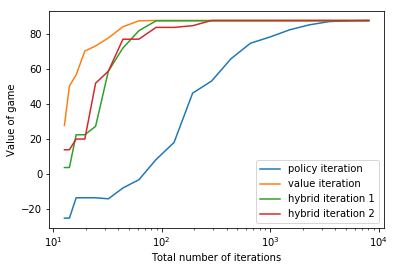

In [47]:
steps = 20
X = np.linspace(1, 9, steps)
X = np.exp(X) + 10
Y = np.zeros((X.shape[0], 4), dtype = np.float32)
gw = GridWorld.get_world('6x12')

def eval_policy(policy):
    value = gw.evaluate_policy(policy = policy)
    value_s = np.sum(value)
    return value_s

for i in range(steps):
    budget = X[i].astype(int)
    
    # policy iteration
    def evalP():
        # the distribution of the budget is focused on doing ten times more iterations then value iterations    
        inner_it = int(math.sqrt(budget))
        m_iter = budget // inner_it
        Q = gw.policy_iteration(max_iter = m_iter, max_iter_eval_iteration = inner_it)
        V = gw.Q2V(Q)
        policy = gw.Q2policy(Q)
        Y[i, 0] = eval_policy(policy)
        
    ignore_warnings(evalP)()
    
    # value iteration
    def evalV():
        Q = gw.value_iteration(max_iter = budget)
        V = gw.Q2V(Q)
        policy = gw.Q2policy(Q)
        Y[i, 1] = eval_policy(policy)
        
    ignore_warnings(evalV)()
        
    # hybrid iteration 1
    def evalH1(pointer):
        # our hybrid approach gives more iterations to the outer loop at the beginging
        inner_it = 5
        m_iter = max(5, budget // inner_it)
        inner_it = min(budget // m_iter, inner_it)        
        #print("for budget {} inner {} outer {}".format(budget, inner_it, m_iter))
        Q = gw.hybrid_iteration(max_iter = m_iter, max_iter_eval_iteration = inner_it)
        V = gw.Q2V(Q)
        policy = gw.Q2policy(Q)
        Y[i, pointer] = eval_policy(policy)

        
    ignore_warnings(evalH1)(pointer = 2)
    
    # hybrid iteration 2
    def evalH2(pointer):
        # second hybrid approach. Same distributionof budget as policy_iteration but keeps V between iterations
        inner_it = int(math.sqrt(budget))
        m_iter = budget // inner_it
        
        Q = gw.hybrid_iteration(max_iter = m_iter, max_iter_eval_iteration = inner_it)
        V = gw.Q2V(Q)
        policy = gw.Q2policy(Q)
        Y[i, pointer] = eval_policy(policy)
        
    ignore_warnings(evalH2)(pointer = 3)
        
    
    
plt.plot(X,Y)
plt.legend(['policy iteration', 'value iteration', 'hybrid iteration 1', 'hybrid iteration 2'])
plt.xscale('log')
plt.xlabel(r'Total number of iterations')
plt.ylabel(r'Value of game')
plt.savefig('../report/figures/e4.pdf', dpi=500, transparent=True)
plt.show()